**Data Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats

In [ ]:

data = pd.read_csv('Product Sales.csv')
print(data.shape)
data.head(10)

(15000, 8)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [ ]:
data.dtypes


week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

**Data Type Validation**

In [ ]:
data['sales_method'] = data['sales_method'].str.lower()
data['sales_method'].replace({'em + call':'email + call'},inplace=True)
data['sales_method'].value_counts()

sales_method
email           7466
call            4962
email + call    2572
Name: count, dtype: int64

In [ ]:
data[['week', 'nb_sold', 'sales_method']] = data[['week', 'nb_sold', 'sales_method']].astype('category')


**Data Cleaning**

In [ ]:

# Drop duplicates
print(data.shape)
data.drop_duplicates(inplace= True)
data.shape

(15000, 8)


(15000, 8)

In [ ]:
data.isna().sum().sort_values()


week                    0
sales_method            0
customer_id             0
nb_sold                 0
years_as_customer       0
nb_site_visits          0
state                   0
revenue              1074
dtype: int64

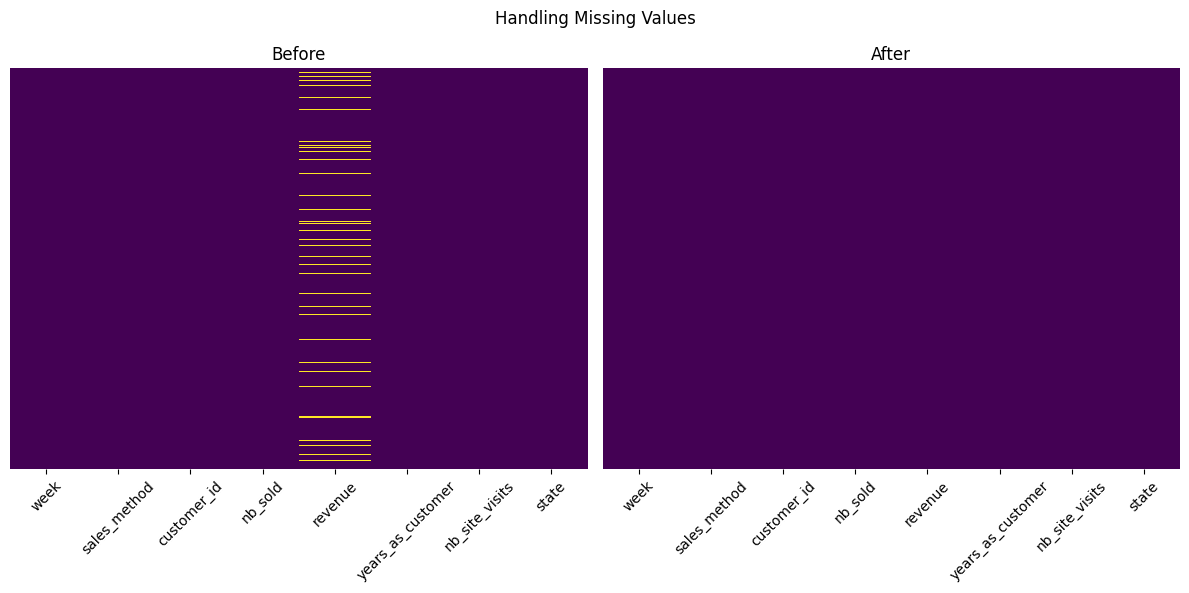

In [ ]:
data_orig = data.copy()
data=data.sort_values(by='nb_sold', ascending=True)
data['revenue'].fillna(method='bfill', inplace=True)

# To check Missing Values
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(data_orig.isnull(), cbar=False, yticklabels=False, cmap="viridis",ax=axes[0])
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap="viridis", ax=axes[1])
axes[0].set_title("Before")
axes[1].set_title("After")
fig.suptitle("Handling Missing Values")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()

In [ ]:

data_bef =data.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

data_num = data.select_dtypes(include = ["float64", "int64"])

for column in data_num.columns:
    handle_outlier(data, column)

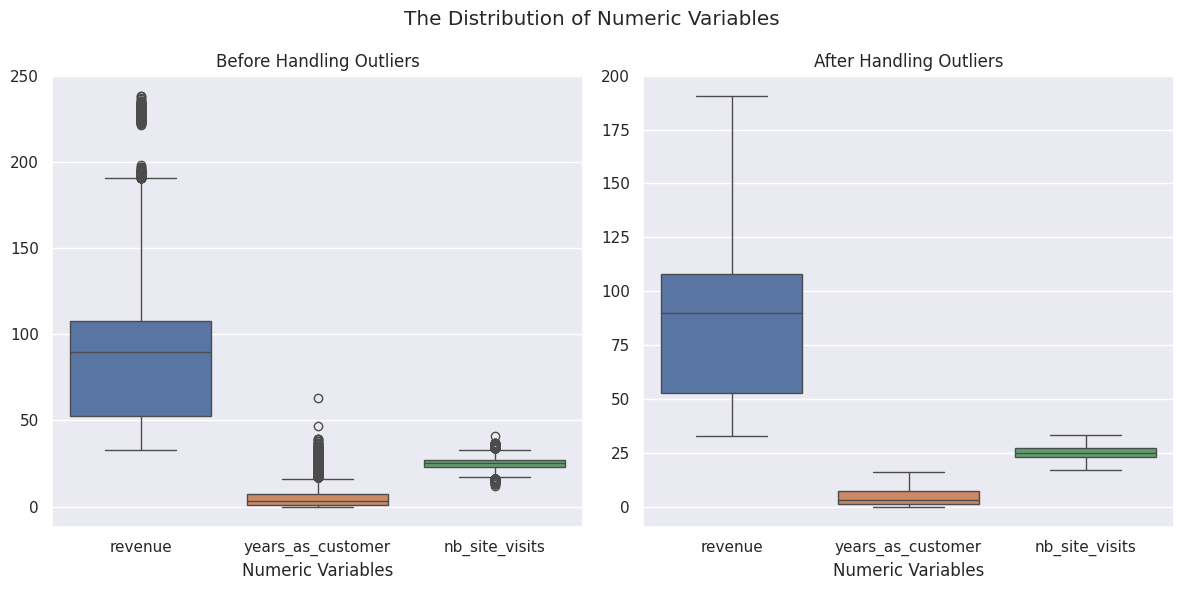

In [ ]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data_bef,ax=axes[0])
sns.boxplot(data,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")

plt.tight_layout()
plt.show()

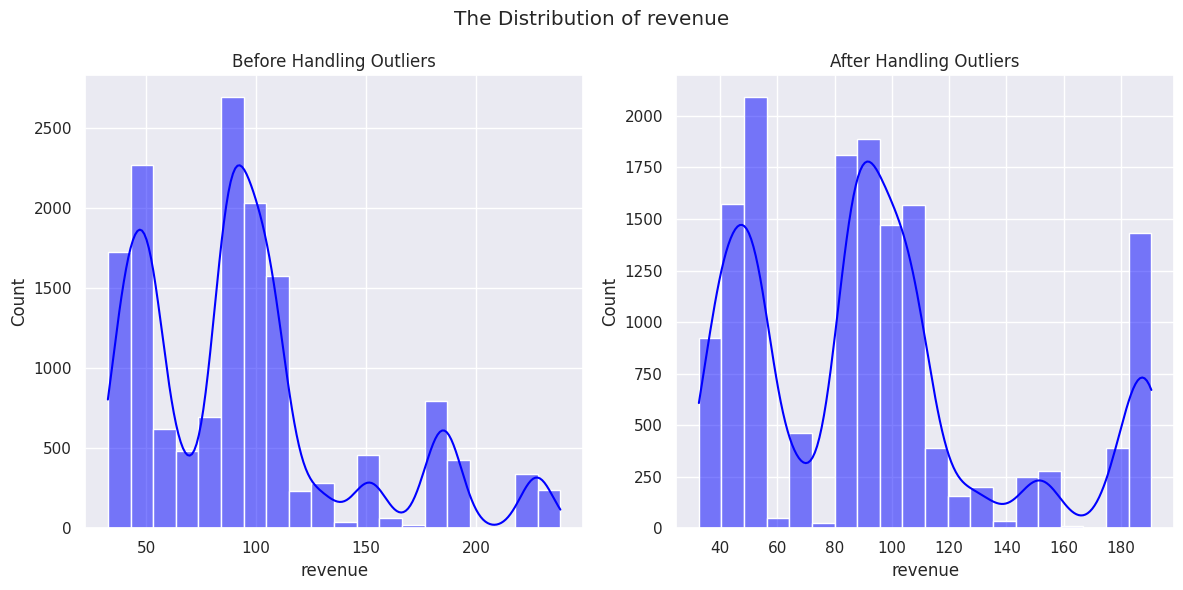

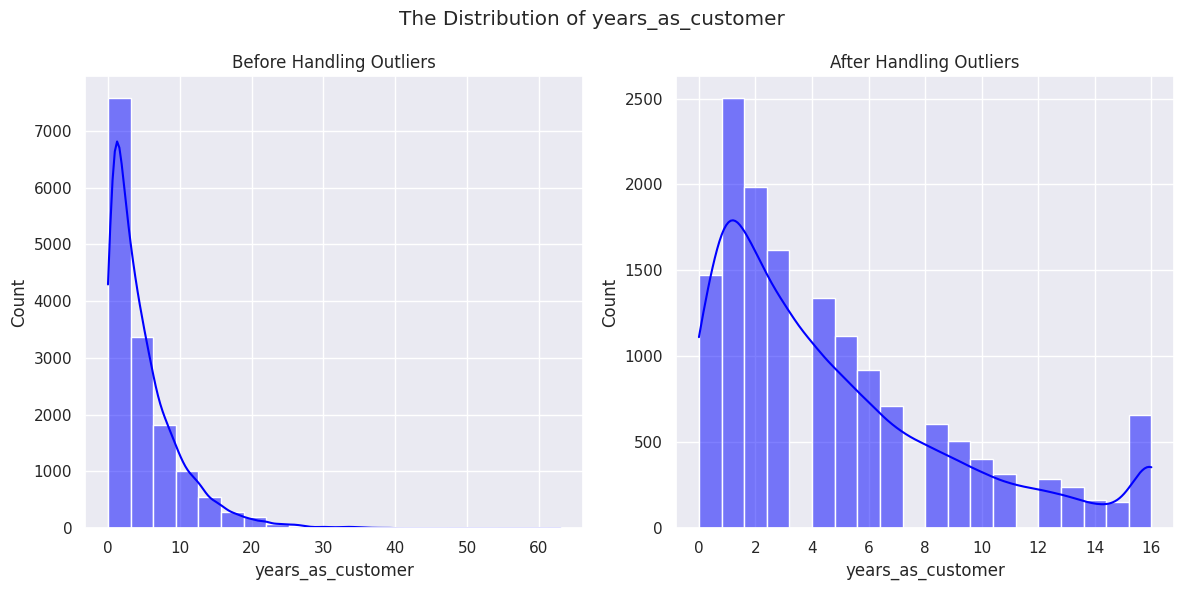

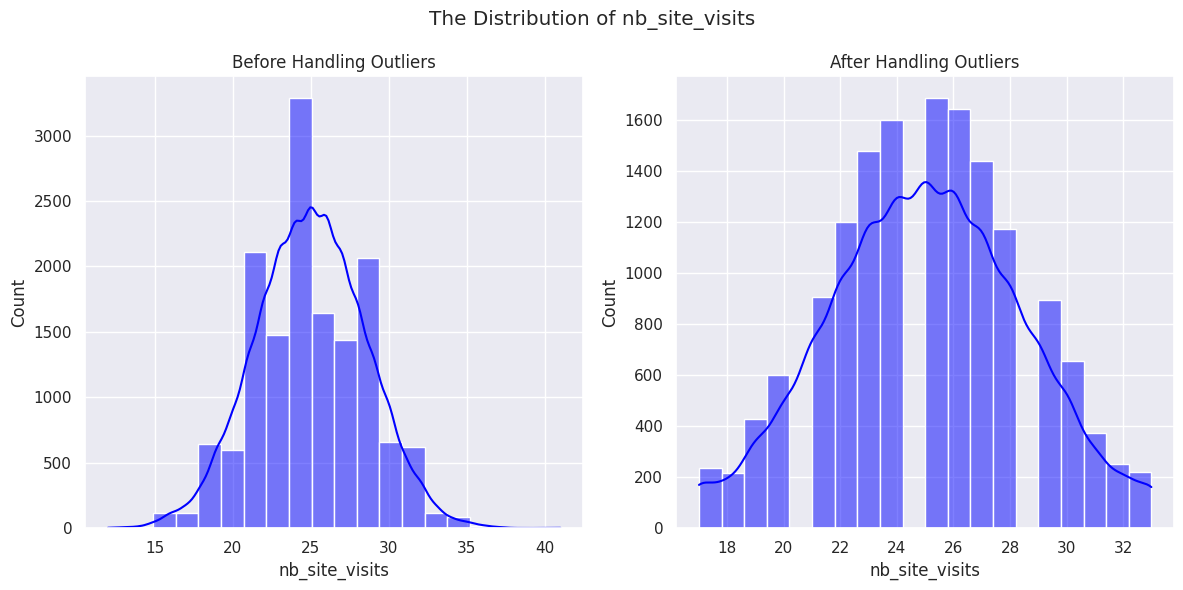

In [ ]:
data_num = data.select_dtypes(include = ["float64", "int64"])
for col in data_num.columns:
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.histplot(data_bef[col], kde=True, color='blue',ax=axes[0], bins=20)
  sns.histplot(data[col], kde=True, color='blue',ax=axes[1], bins=20)
  axes[0].set_title("Before Handling Outliers")
  axes[1].set_title("After Handling Outliers")
  fig.suptitle('The Distribution of '+col)
  plt.tight_layout()
  plt.show()

In [ ]:
data[['years_as_customer', 'nb_site_visits']] = data[['years_as_customer', 'nb_site_visits']].astype('int64')


**Exploratory Analysis**

In [ ]:
data.sample(n=10)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
4491,5,email + call,fb6798c9-3579-4c0e-9b6d-e947fd3aea11,12,184.590,5,26,Texas
7306,6,call,6899965e-fd03-4f7a-bb14-c7f6e59beca6,13,66.880,2,25,New York
11221,6,call,58e0a1c1-5e31-479e-8522-9743e53da72c,13,64.400,4,28,Iowa
9769,1,call,96ec08f6-890e-408c-9713-146d1e7d8bc8,7,36.270,1,17,Texas
3124,1,call,1c7fbb9b-7c82-421c-8c00-5c81cab155b0,7,34.860,16,20,Arizona
2917,5,call,bfcb8449-50b8-46cc-a5d2-5a17454c32c8,10,51.160,1,33,New York
1067,6,call,7973e799-b95c-475b-858a-fb85754cbab7,13,66.840,9,27,New York
11266,4,email,760763b0-bbed-4784-81e3-8ae8e2ce6f9c,11,109.140,2,30,Michigan
1166,1,email,8cca51c8-92c4-4122-9692-34ee554582d1,9,88.560,9,22,Texas
14553,6,email + call,d3ff6ded-85bb-4ade-9cc5-7b8be781a76a,15,190.615,1,30,North Dakota


sales_method
call            4962
email           7466
email + call    2572
dtype: int64


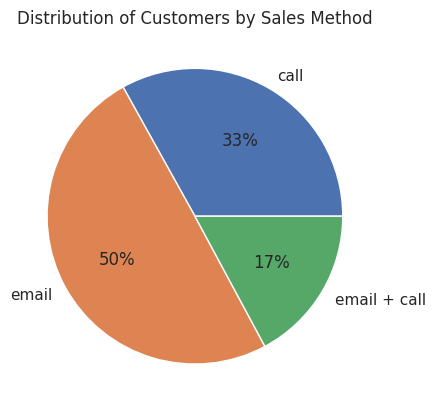

In [ ]:
# How many customers were there for each approach?
Customers = data.groupby('sales_method').size()
print(Customers)
Customers.plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of Customers by Sales Method')
plt.show()

<ipython-input-15-f60d1d8d210e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['revenue'], shade=True)


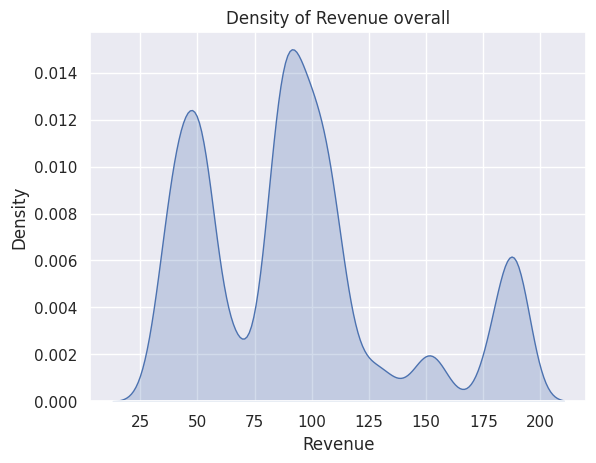

In [ ]:

# What does the spread of the revenue look like overall?
sns.kdeplot(data['revenue'], shade=True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('Density of Revenue overall')
plt.show()

sales_method
call            242968.065
email           718012.340
email + call    441038.225
Name: revenue, dtype: float64


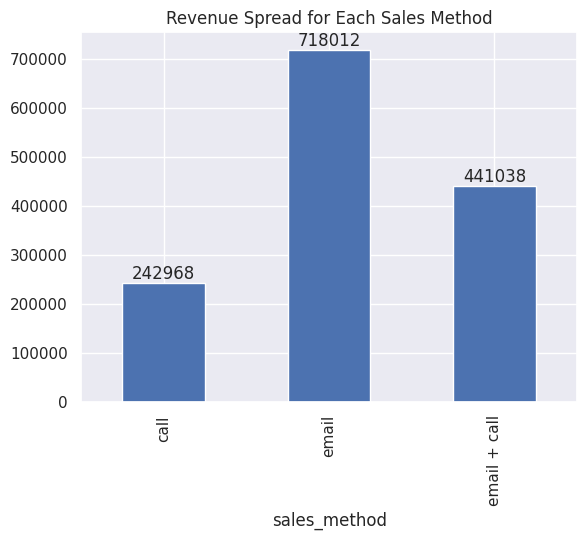

In [ ]:

# What does the spread of the revenue look like for each method?
Mean_revenue = data.groupby('sales_method')['revenue'].sum()
print(Mean_revenue)
cx = Mean_revenue.plot.bar()
cx.bar_label(cx.containers[0], label_type='edge')
plt.title('Revenue Spread for Each Sales Method')
plt.show()

Text(0.5, 1.0, 'The revenue of all sales methods increased each week')

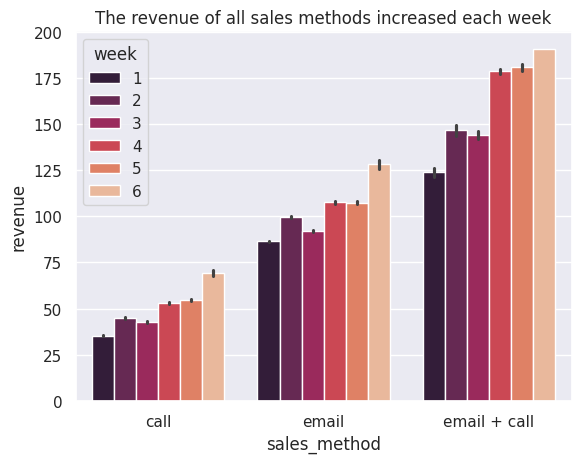

In [ ]:
# Was there any difference in revenue over time for each of the methods?
sns.barplot(
    data=data, x="sales_method", y="revenue", hue="week", palette="rocket")

plt.title('The revenue of all sales methods increased each week')

In [ ]:
# the mean and medians of the methods' revenue per week
data.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack().style.background_gradient()